**DATA WAREHOUSE MODELLING -USING DATA DEFINITION LANGUAGE TO CREATE A STAR SCHEMA**

- **Building  a  database**

Here are the basic steps to use Data Definition Language (DDL) to create schemas

To begin, We need to create a database and name it. So for this, we created a database called **Target\_Mart.** 

Below is a picture guide on creating a database in SQL Server Management Studio

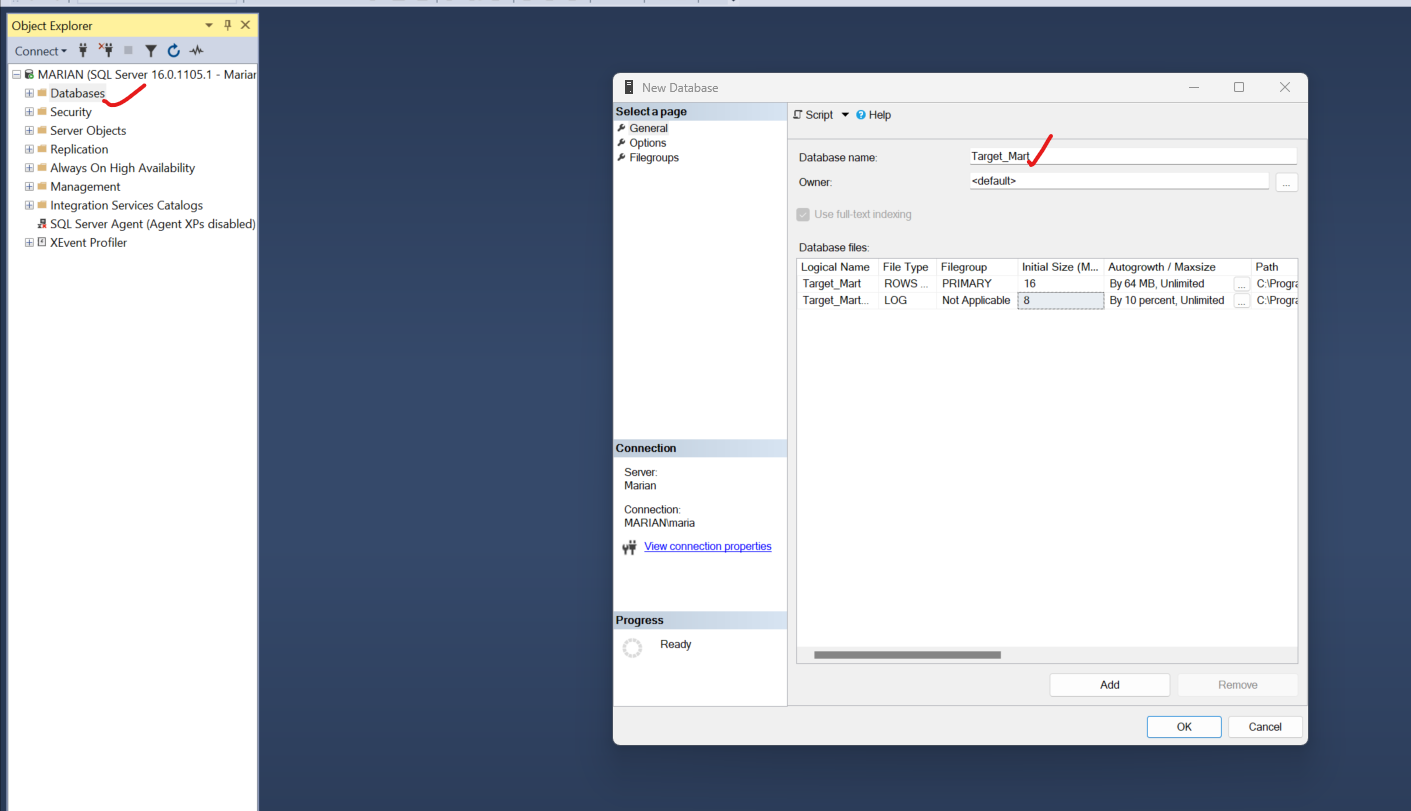

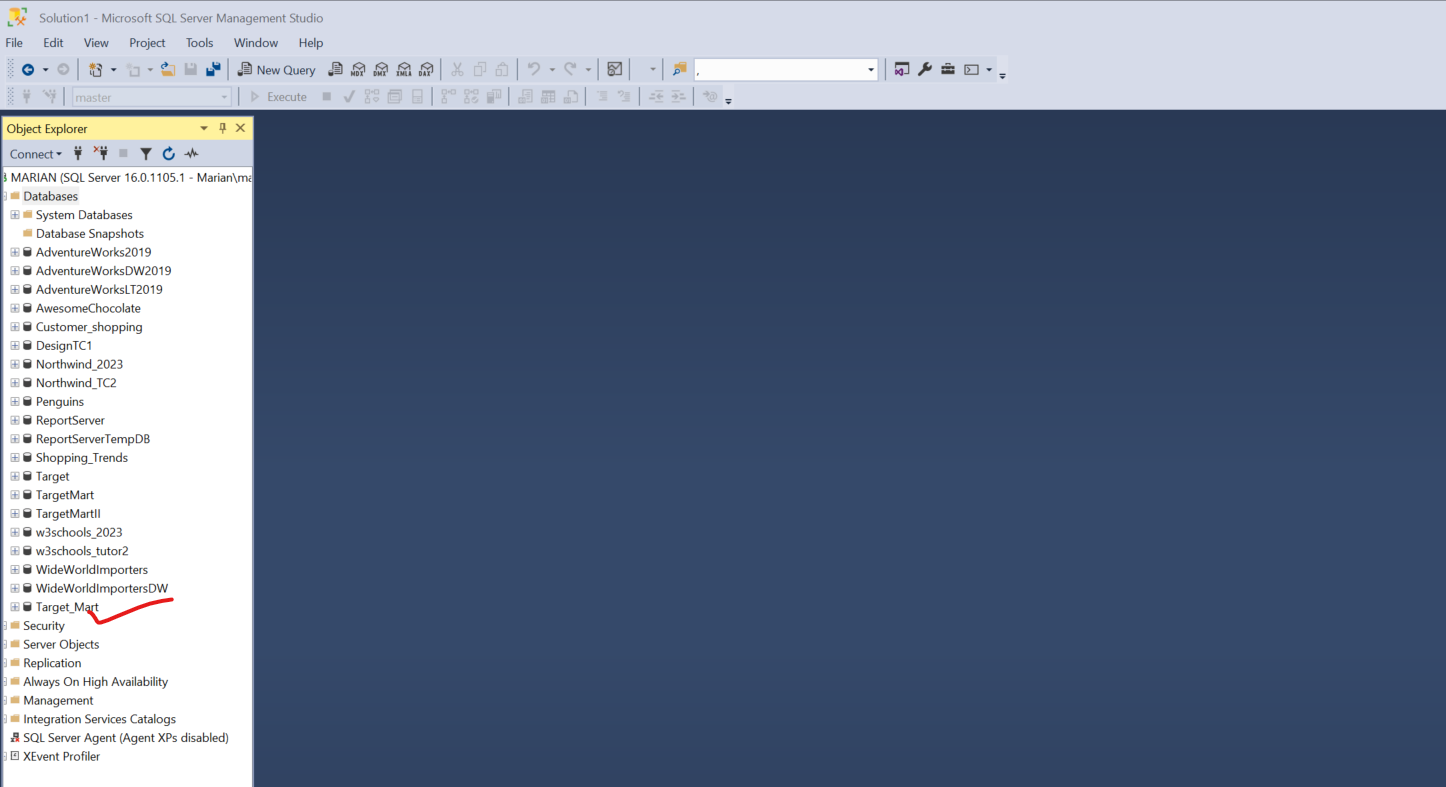

- **Creating Schemas**

Next we need to create some **schemas**. **Schemas** acts as a namespace or container that holds database objects such as tables ,views and stored procedures. We will be creating tables but first we need our schema to hold our tables when we finally create them. Below is  query  script to create some schemas for our database **Target\_Mart.**

In [10]:

USE Target_Mart;
GO

/*********************************************************/
/******************    Schema DDL       ******************/
/*********************************************************/

IF NOT EXISTS (SELECT * FROM sys.schemas WHERE name = 'dim' )
BEGIN
	EXEC sp_executesql N'CREATE SCHEMA dim AUTHORIZATION dbo;'
END
;

GO

IF NOT EXISTS (SELECT * FROM sys.schemas WHERE name = 'stg' )
BEGIN
	EXEC sp_executesql N'CREATE SCHEMA stg AUTHORIZATION dbo;'
END
;

GO

IF NOT EXISTS (SELECT * FROM sys.schemas WHERE name = 'f' )
BEGIN
	EXEC sp_executesql N'CREATE SCHEMA f AUTHORIZATION dbo;'
END
;

GO

IF NOT EXISTS (SELECT * FROM sys.schemas WHERE name = 'rpt' ) 
BEGIN
	EXEC sp_executesql N'CREATE SCHEMA rpt AUTHORIZATION dbo;'
END
;

GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.015

- **Creating Tables**

We have successfully created a schema now it's time to create some **Tables.** We will need 2  types of tables to create a star schema.  **Dimensional** **Tables and Facts Tables.**

In T-SQL, a fact table is a table that contains the measures or facts of a business process. These measures are usually numeric and can be aggregated. A fact table is typically associated with one or more dimension tables that provide descriptive information about the facts.<span style="font-size: 10.5pt; line-height: 107%; font-family: &quot;Segoe UI&quot;, sans-serif; color: rgb(102, 102, 102); background: white;">Dimension tables provide descriptive information for all the measurements recorded in the fact table</span><span style="font-size: 10pt; line-height: 107%; font-family: Roboto; color: rgb(102, 102, 102); background: white;">.</span> <span style="font-size: 10.5pt; background-image: initial; background-position: initial; background-size: initial; background-repeat: initial; background-attachment: initial; background-origin: initial; background-clip: initial; color: var(--vscode-foreground); line-height: 107%; font-family: &quot;Segoe UI&quot;, sans-serif;">&nbsp;<strong>Source: Microsoft Bing.com.</strong></span>

<span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);">In the Dimension tables, we will set the</span> _PRIMARY KEYS and UNIQUE CONSTRAINTS and in the_ <span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);">Fact tables, we will set the&nbsp;</span> _FOREIGN KEYS_<span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);">.</span>

<span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);">Primary keys and Foreign keys are set to create relations between the Fact tables and the Dimensional Tables.</span>

<span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);"><b>Below is a script for creating 5 Dimensional Tables</b></span>

<span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);"><b><br></b></span>

In [11]:


/*********************************************************/
/******************  Customer DIM DDL   ******************/
/*********************************************************/

IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Customers')
BEGIN
	CREATE TABLE dim.Customers(
	pkCustomer int IDENTITY(1000,1) NOT NULL,
	CustomerID nvarchar(5) NOT NULL,
	Customer nvarchar(40) NOT NULL,
	City nvarchar(15) NULL,
	Country nvarchar(15) NULL,
	LoadDate DATE NOT NULL,
	SourceCountry nvarchar(25) NULL
	)
	;

	ALTER TABLE dim.Customers
	ADD CONSTRAINT PK_Customers_LUP PRIMARY KEY(pkCustomer);

	ALTER TABLE dim.Customers
    ADD CONSTRAINT UC_Customers_ID UNIQUE (CustomerID);

END

GO

/*********************************************************/
/****************** Calendar DIM Script ******************/
/*********************************************************/

IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Calendar')
BEGIN
-- Create the Calendar table
CREATE TABLE dim.Calendar
(
    pkCalendar INT NOT NULL,
    DateValue DATE NOT NULL,
    Year INT NOT NULL,
    Quarter INT NOT NULL,
	Qtr VARCHAR(3) NOT NULL,
    Month INT NOT NULL,
    MonthName VARCHAR(10) NOT NULL,
	MonthShort VARCHAR(3) NOT NULL,
    Week INT NOT NULL,
    Day INT NOT NULL,
	DayName VARCHAR(10) NOT NULL,
	DayShort VARCHAR(3) NOT NULL,
    IsWeekday BIT NOT NULL,
	Weekday VARCHAR(3) NOT NULL
);

	ALTER TABLE dim.Calendar
	ADD CONSTRAINT PK_Calendar_Julian PRIMARY KEY(pkCalendar);

	ALTER TABLE dim.Calendar
    ADD CONSTRAINT UC_Calendar UNIQUE (DateValue);
END

GO

/*********************************************************/
/******************  Shipper DIM DDL    ******************/
/*********************************************************/

IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Shipper')
BEGIN
-- Create the Calendar table
CREATE TABLE dim.Shipper
(
    pkShipId INT NOT NULL,
	Shipper nvarchar(40) NOT NULL,
	Phone nvarchar(24) NULL
);

	ALTER TABLE dim.Shipper
	ADD CONSTRAINT PK_Ship PRIMARY KEY(pkShipId);
END

GO

/*********************************************************/
/******************  Products DIM DDL   ******************/
/*********************************************************/

IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Products')
BEGIN
CREATE TABLE dim.Products(
	pkProdId int NOT NULL,
	ProductId int NOT NULL,
	Product nvarchar(50) NOT NULL,
	ProductCategory nvarchar(25) NOT NULL,
	CategoryDesc ntext NULL,
	UnitPrice money NULL,
	UnitsInStock int NULL,
	UnitsOnOrder int NULL,
	ReorderLevel int NULL,
	Discontinued bit NOT NULL,
	ReorderFlag nvarchar(3) NOT NULL
);

	ALTER TABLE dim.Products
	ADD CONSTRAINT PK_Prods PRIMARY KEY(pkProdId);

	ALTER TABLE dim.Products
    ADD CONSTRAINT UC_Prods UNIQUE (ProductId);
END
;
GO

/*********************************************************/
/******************  Employees DIM DDL   ******************/
/*********************************************************/

IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Employees')
BEGIN
CREATE TABLE dim.Employees(
	EmployeeID int NOT NULL,
	Employee nvarchar(50) NOT NULL,
	Title nvarchar(30) NULL,
	BirthDate datetime NULL,
	HireDate datetime NULL,
	City nvarchar(15) NULL,
	Country nvarchar(15) NULL,
	ReportsTo int NULL
);
	ALTER TABLE dim.Employees
	ADD CONSTRAINT PK_Emp PRIMARY KEY(EmployeeID);

END

GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.128

Next is to create our Fact Tables. We set up Foreign Keys to match up with primary keys in our DimensionTables.

**NB: 1. To create a successful relationship between Facts and Dimension tables, there should be  data consistency between the two tables,** <span style="font-weight: bold; color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space-collapse: preserve;">while the content of fact and dimension tables is different in terms of the type of data they store, they must be designed and maintained in a way that allows for a meaningful and consistent relationship between them.</span>

<span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; font-weight: bold; white-space-collapse: preserve;">2. It is not necessary to set Primary Keys for Fact tables as these tables have inherited Primary Keys.</span>

### Below is a DDL script for creating 2 Fact tables.

In [12]:
/*********************************************************/
/*********************************************************/
/*********************************************************/
/******************  Fact Table Builds  ******************/
/*********************************************************/
/*********************************************************/
/*********************************************************/



/*********************************************************/
/******************  OrderPerf f.Table  ******************/
/*********************************************************/

-- OrderID, OrderDate, Customer, Freight(f)
IF EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'f' AND TABLE_NAME = 'OrderPerf')
BEGIN
	DROP TABLE f.OrderPerf;
END

GO

CREATE TABLE f.OrderPerf(
	OrderID int NOT NULL,
	fkCalendar int NOT NULL,
	fkCustomer int NOT NULL,
	fkShipper int NULL,
	fkEmployee int NULL,
	Freight money NOT NULL,
	DaysToShip int NULL,
	DaysTilRequired int NULL,
	OrderCount int NOT NULL
);

-- Could use PRIMARY or UNIQUE for the OrderID - just used to not load dupes = doublecounting

ALTER TABLE f.OrderPerf
ADD CONSTRAINT PK_ORD PRIMARY KEY(OrderID)
;

ALTER TABLE f.OrderPerf
ADD CONSTRAINT FK_ORDtoCAL
	FOREIGN KEY (fkCalendar)              -- FROM the LOCAL TABLE
	 REFERENCES  dim.Calendar(pkCalendar) -- TO the FOREIGN TABLE
;

ALTER TABLE f.OrderPerf
ADD CONSTRAINT FK_ORDtoCUST
	FOREIGN KEY (fkCustomer)              -- FROM the LOCAL TABLE
	 REFERENCES  dim.Customers(pkCustomer) -- TO the FOREIGN TABLE
;

ALTER TABLE f.OrderPerf
ADD CONSTRAINT FK_ORDtoSHIP
	FOREIGN KEY (fkShipper)
	 REFERENCES dim.Shipper(pkShipId)
;

ALTER TABLE f.OrderPerf
ADD CONSTRAINT FK_ORDtoEMP
	FOREIGN KEY (fkEmployee)
	 REFERENCES dim.Employees(EmployeeID)
;

/************************************************************/
/******************  ProductsPerf f.Table  ******************/
/************************************************************/

IF EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'f' AND TABLE_NAME = 'ProductPerf')
BEGIN
	DROP TABLE f.ProductPerf;
END

CREATE TABLE f.ProductPerf(
	OrderID int NOT NULL,
	fkProductID int NOT NULL,
	OrderDate int NOT NULL,
	fkCustomerID int NOT NULL,
	UnitPrice money NOT NULL,
	Quantity smallint NOT NULL,
	Discount float NOT NULL,
	DiscFlag int NOT NULL,
	LineTotal money NULL
);

ALTER TABLE f.ProductPerf
ADD CONSTRAINT PK_ProdPerf PRIMARY KEY(OrderID, fkProductID)
;

ALTER TABLE f.ProductPerf
ADD CONSTRAINT FK_PRODtoPROD
	FOREIGN KEY (fkProductID)
	 REFERENCES dim.Products(pkProdId)
;

ALTER TABLE f.ProductPerf
ADD CONSTRAINT FK_PRODtoCAL
	FOREIGN KEY (OrderDate)
	 REFERENCES dim.Calendar(pkCalendar)
;

ALTER TABLE f.ProductPerf
ADD CONSTRAINT FK_PRODtoCUST
	FOREIGN KEY (fkCustomerID)
	 REFERENCES dim.Customers(pkCustomer)
;
 

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.063